#### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does thedataset have?

In [1]:
import pandas as pd

# Load the Excel file
flight_data = pd.read_excel('flight_price.xlsx')

# Get the dimensions of the dataset
rows, columns = flight_data.shape

# Output the result
print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 10683 rows and 11 columns.


#### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize thedistribution.

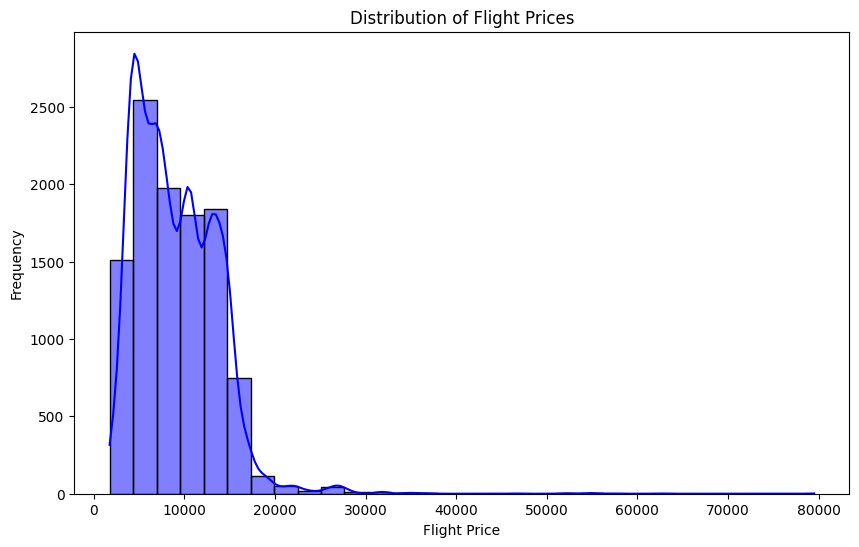

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'flight_price.xlsx'
flight_data = pd.read_excel(file_path)

# Plot the distribution of flight prices
plt.figure(figsize=(10, 6))

# Assuming the flight price column is named 'Price' (adjust if necessary)
sns.histplot(flight_data['Price'], bins=30, kde=True, color='blue')

# Add title and labels
plt.title('Distribution of Flight Prices')
plt.xlabel('Flight Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [3]:
import pandas as pd

# Load the dataset
file_path = 'flight_price.xlsx'
flight_data = pd.read_excel(file_path)

# Get the minimum and maximum prices
min_price = flight_data['Price'].min()
max_price = flight_data['Price'].max()

# Calculate the range of prices
price_range = max_price - min_price

# Output the results
print(f'Minimum Price: {min_price}')
print(f'Maximum Price: {max_price}')
print(f'Range of Prices: {price_range}')


Minimum Price: 1759
Maximum Price: 79512
Range of Prices: 77753


#### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of differentairlines.

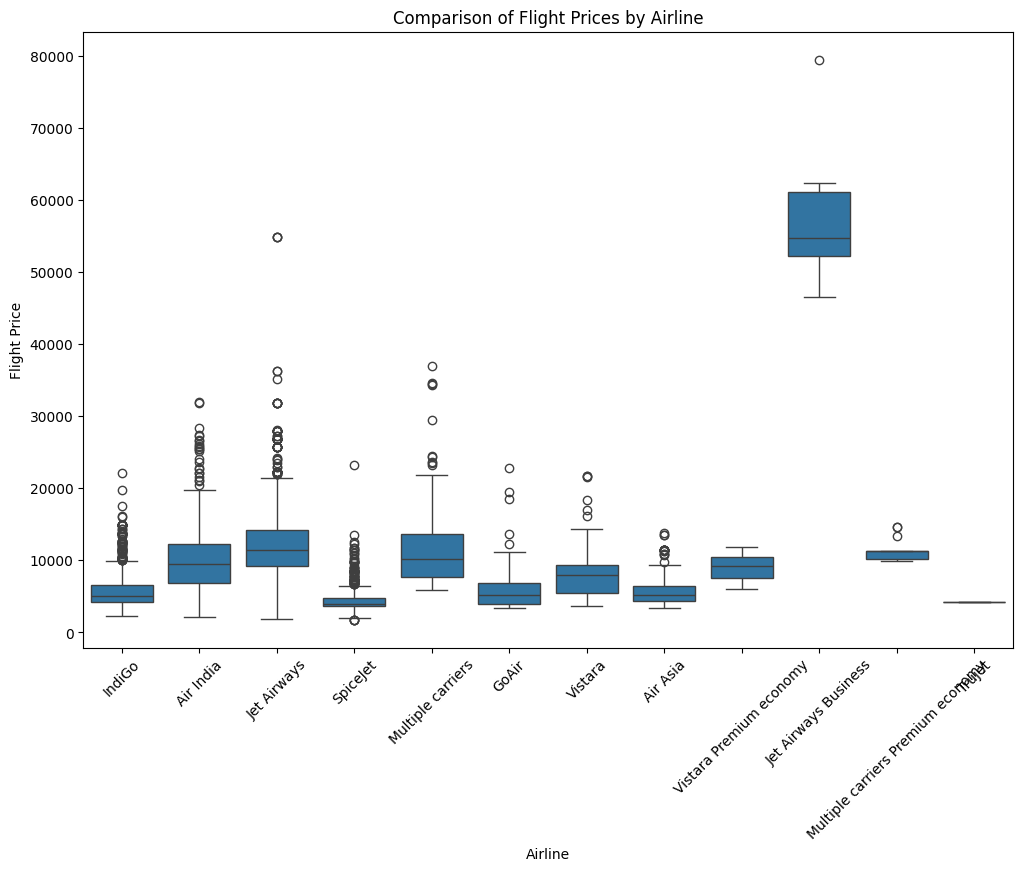

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'flight_price.xlsx'
flight_data = pd.read_excel(file_path)

# Plot the boxplot to compare prices by airline
plt.figure(figsize=(12, 8))

# Assuming the airline column is named 'Airline' and price column is 'Price' (adjust if necessary)
sns.boxplot(x='Airline', y='Price', data=flight_data)

# Add title and labels
plt.title('Comparison of Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Flight Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe howthey may impact your analysis.

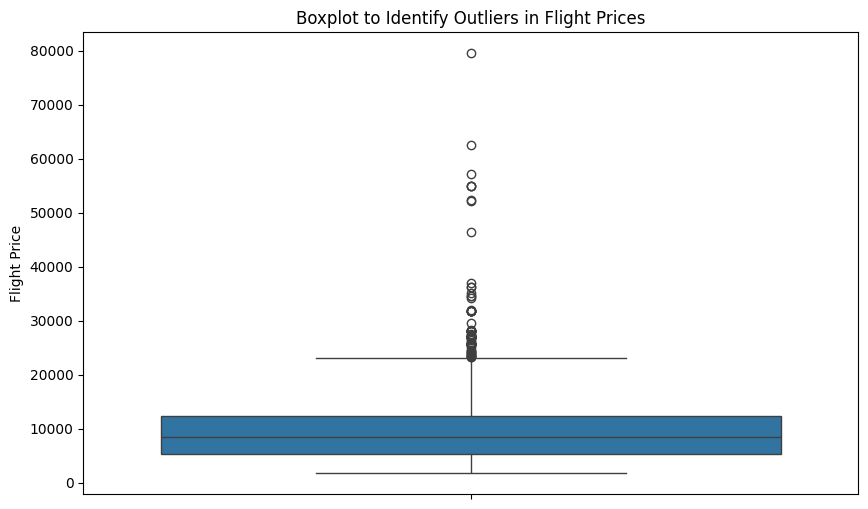

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'flight_price.xlsx'
flight_data = pd.read_excel(file_path)

# Plot the boxplot for flight prices to detect outliers
plt.figure(figsize=(10, 6))

# Assuming the price column is 'Price'
sns.boxplot(y=flight_data['Price'])

# Add title and labels
plt.title('Boxplot to Identify Outliers in Flight Prices')
plt.ylabel('Flight Price')

# Show the plot
plt.show()


Yes, based on the boxplot, there are clearly outliers in the flight price data. These outliers are represented by the individual data points that are significantly higher than the bulk of the data, beyond the upper whisker of the boxplot.

#### Identifying Outliers:
- Based on the boxplot, there are clearly **outliers** in the flight price data. These outliers are represented by the individual data points that are significantly higher than the bulk of the data, beyond the upper whisker of the boxplot.
- The majority of the flight prices seem to be concentrated below around **₹20,000**, but there are several flights priced well above this, with some reaching **₹80,000**.
- The whiskers extend slightly beyond **₹20,000**, indicating that prices above this may be considered outliers.

#### How Outliers May Impact the Analysis:
1. **Skewed Mean**: 
   - The presence of these high-priced outliers will inflate the average (mean) flight price, making the dataset appear more expensive than it truly is for most customers.

2. **Misleading Variability**:
   - Standard deviation and variance will also increase due to these outliers, which could misrepresent the overall variability in flight prices. This is especially relevant for models that assume a normal distribution.

3. **Decision-making**:
   - If you're using this data for pricing strategies or demand prediction, you might consider handling outliers separately or removing them if they represent rare or exceptional cases that don't reflect typical flight prices.


#### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price datasetto identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

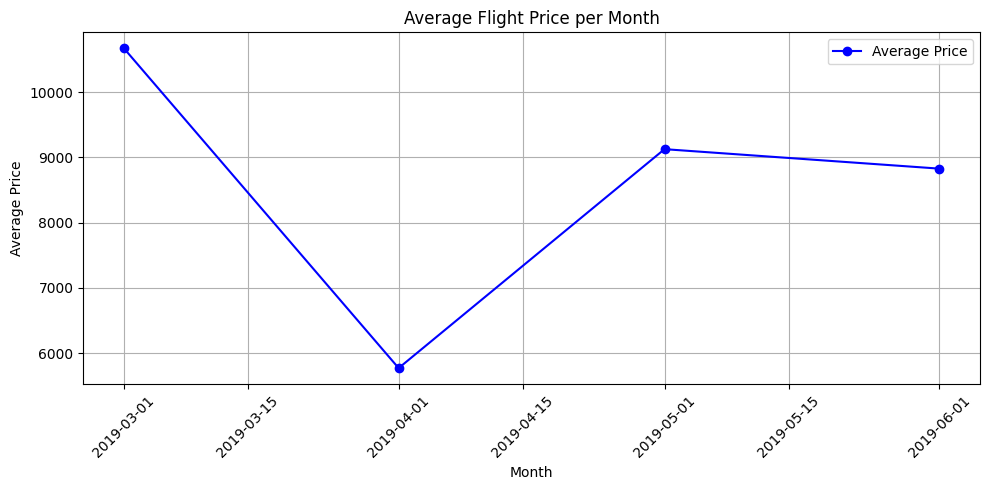

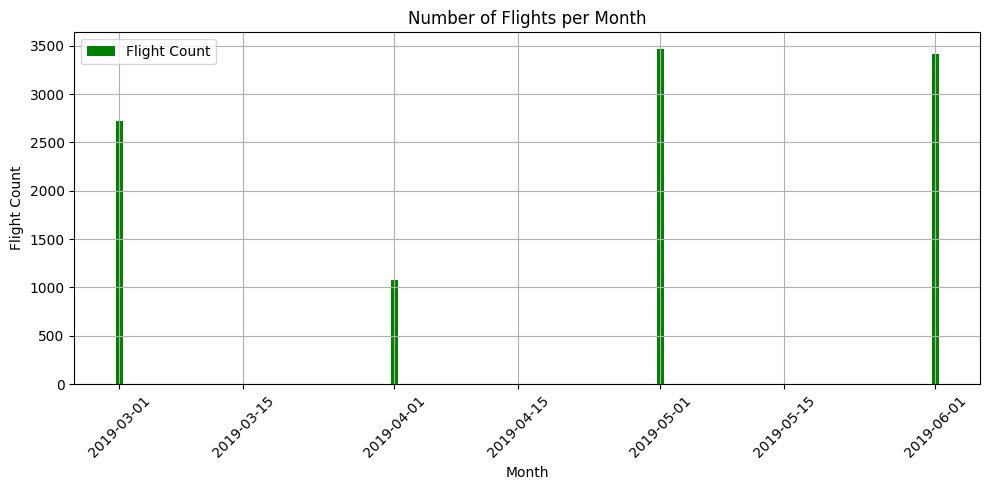

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from a CSV file 
data = pd.read_excel('flight_price.xlsx')

# Convert Date_of_Journey to datetime and extract the month and year
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y', errors='coerce')
data['Month'] = data['Date_of_Journey'].dt.month_name()
data['Year'] = data['Date_of_Journey'].dt.year

# Drop rows with missing or malformed dates
data = data.dropna(subset=['Date_of_Journey'])

# Group data by month and year to find the average price and flight count
monthly_data = data.groupby(['Year', 'Month']).agg({
    'Price': 'mean',
    'Airline': 'count'
}).rename(columns={'Airline': 'Flight Count'})

# Reset index for better visualization
monthly_data = monthly_data.reset_index()

# Sort data by Year and Month for accurate plotting
monthly_data['Date'] = pd.to_datetime(monthly_data['Month'] + ' ' + monthly_data['Year'].astype(str), format='%B %Y')
monthly_data = monthly_data.sort_values('Date')

# Plot the average price over months
plt.figure(figsize=(10, 5))
plt.plot(monthly_data['Date'], monthly_data['Price'], marker='o', color='b', label='Average Price')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Flight Price per Month')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the number of flights over months
plt.figure(figsize=(10, 5))
plt.bar(monthly_data['Date'], monthly_data['Flight Count'], color='g', label='Flight Count')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.title('Number of Flights per Month')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


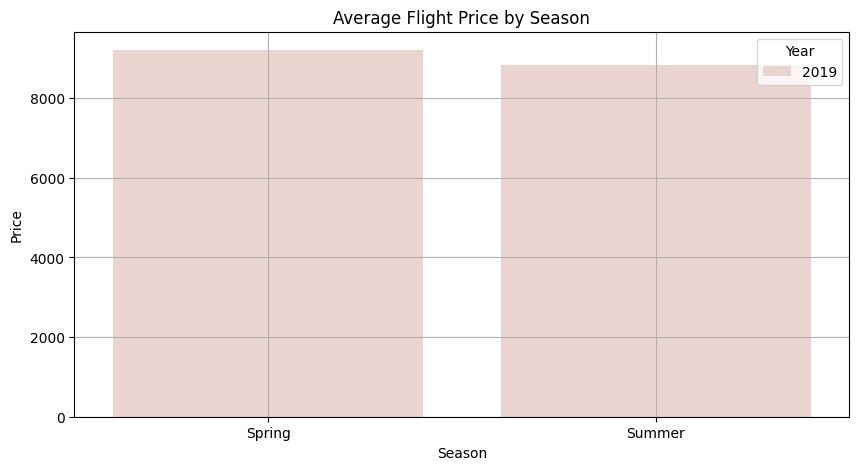

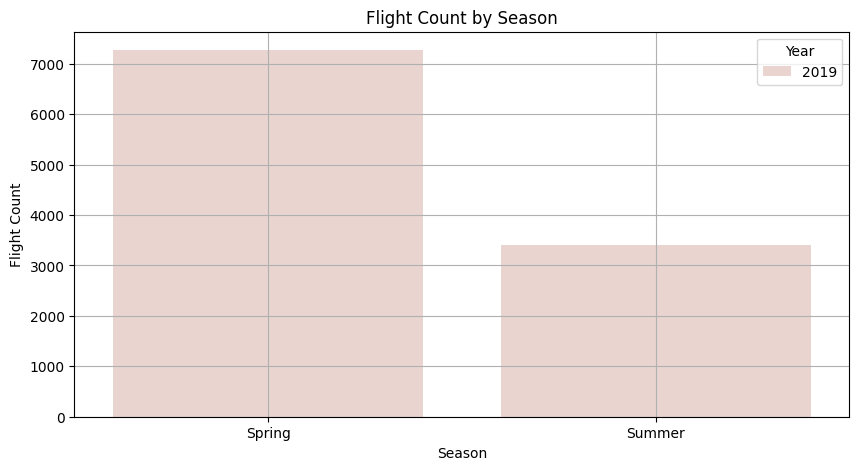

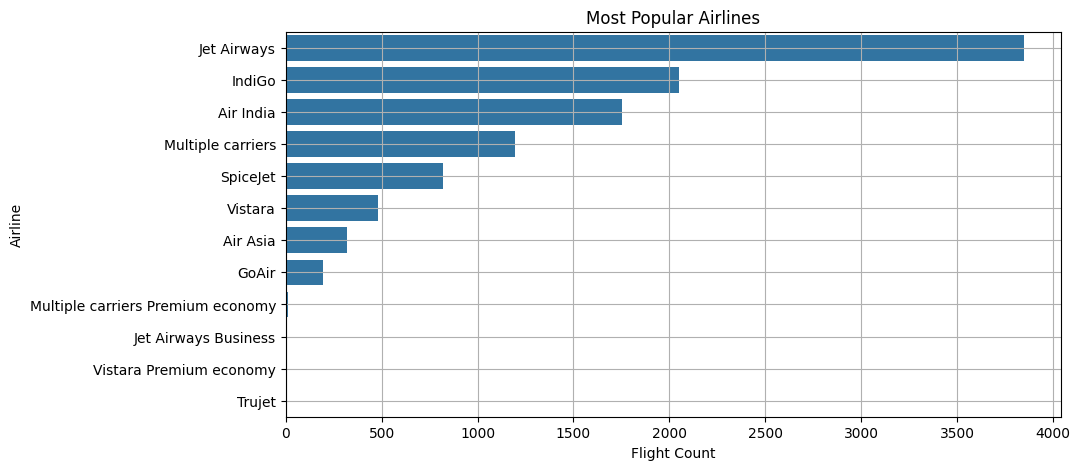

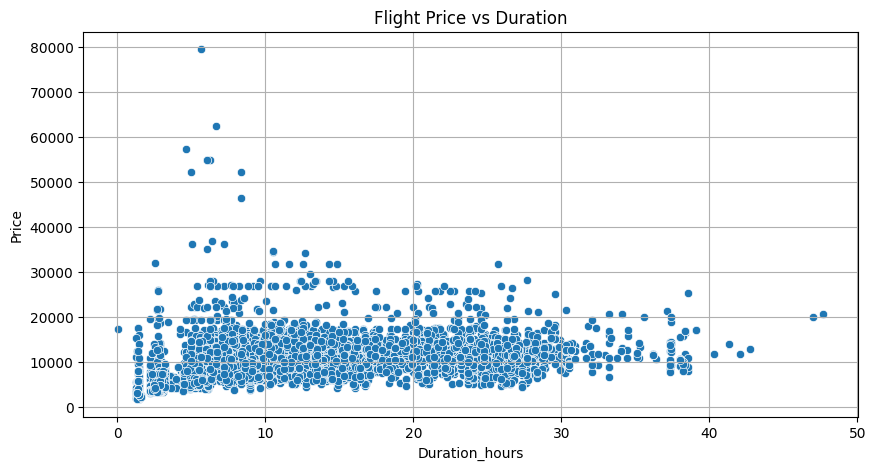

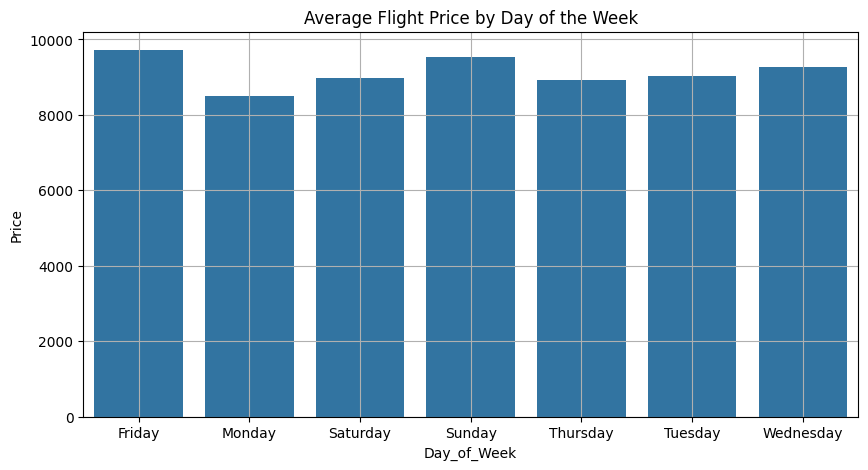

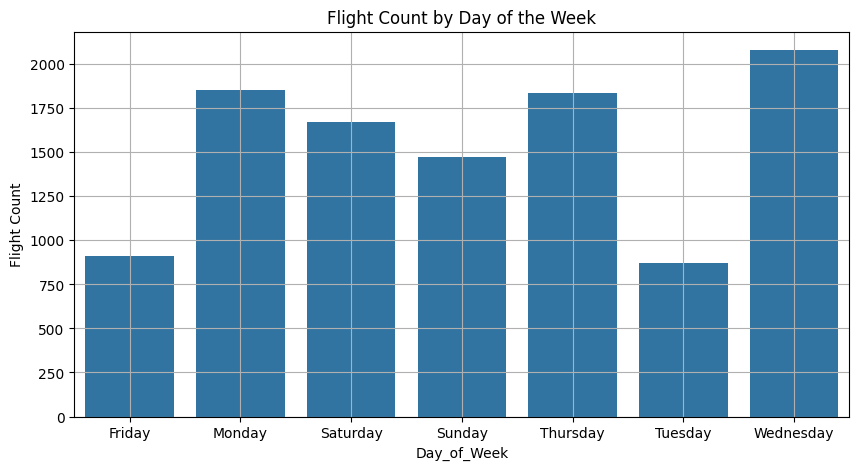

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a CSV file 
data = pd.read_excel('flight_price.xlsx')

# Convert Date_of_Journey to datetime and extract the month, year, and day of the week
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y', errors='coerce')
data['Month'] = data['Date_of_Journey'].dt.month_name()
data['Year'] = data['Date_of_Journey'].dt.year
data['Day_of_Week'] = data['Date_of_Journey'].dt.day_name()

# Drop rows with missing or malformed dates
data = data.dropna(subset=['Date_of_Journey'])

# 1. Seasonal Analysis
# Define a function to categorize the month into seasons
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Autumn'

data['Season'] = data['Month'].apply(get_season)

# Group by season and year to get the average price and flight count
seasonal_data = data.groupby(['Year', 'Season']).agg({
    'Price': 'mean',
    'Airline': 'count'
}).rename(columns={'Airline': 'Flight Count'})

# Reset index for better visualization
seasonal_data = seasonal_data.reset_index()

# Plot the average price and flight count by season
plt.figure(figsize=(10, 5))
sns.barplot(x='Season', y='Price', hue='Year', data=seasonal_data)
plt.title('Average Flight Price by Season')
plt.grid(True)
plt.show()

# Plot the flight count by season
plt.figure(figsize=(10, 5))
sns.barplot(x='Season', y='Flight Count', hue='Year', data=seasonal_data)
plt.title('Flight Count by Season')
plt.grid(True)
plt.show()

# 2. Most Popular Airlines
airline_data = data.groupby('Airline').agg({
    'Price': 'mean',
    'Airline': 'count'
}).rename(columns={'Airline': 'Flight Count'})

# Reset index
airline_data = airline_data.reset_index()

# Plot the most popular airlines
plt.figure(figsize=(10, 5))
sns.barplot(x='Flight Count', y='Airline', data=airline_data.sort_values(by='Flight Count', ascending=False))
plt.title('Most Popular Airlines')
plt.grid(True)
plt.show()

# 3. Flight Duration Analysis 
if 'Duration' in data.columns:
    # Create a function to convert duration to hours
    def convert_duration(duration):
        if isinstance(duration, str):
            # Handle durations like '5h 45m' or '1h'
            hours = 0
            minutes = 0
            if 'h' in duration:
                hours = int(duration.split('h')[0])
                if 'm' in duration:
                    minutes = int(duration.split('h')[1].strip('m'))
            elif 'm' in duration:
                minutes = int(duration.strip('m'))
            return hours + minutes / 60
        return None  # Handle cases where the duration is missing or malformed

    # Apply the conversion function to the Duration column
    data['Duration_hours'] = data['Duration'].apply(convert_duration)
    
    # Drop rows where duration could not be converted
    data = data.dropna(subset=['Duration_hours'])

    # Plot the relationship between flight duration and price
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='Duration_hours', y='Price', data=data)
    plt.title('Flight Price vs Duration')
    plt.grid(True)
    plt.show()


# 4. Day of Week Analysis
# Group by day of the week to analyze average price and flight count
day_of_week_data = data.groupby('Day_of_Week').agg({
    'Price': 'mean',
    'Airline': 'count'
}).rename(columns={'Airline': 'Flight Count'})

# Reset index
day_of_week_data = day_of_week_data.reset_index()

# Plot the average price by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(x='Day_of_Week', y='Price', data=day_of_week_data)
plt.title('Average Flight Price by Day of the Week')
plt.grid(True)
plt.show()

# Plot the flight count by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(x='Day_of_Week', y='Flight Count', data=day_of_week_data)
plt.title('Flight Count by Day of the Week')
plt.grid(True)
plt.show()


#### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the FlightPrice dataset to identify any trends in flight prices. What features would you analyze to identify thesetrends, and what visualizations would you use to present your findings to your team?

#### Key Features to Analyze

1. **Airline**
   - Determine if different airlines have varying price ranges and trends over time.

2. **Date of Journey**
   - Analyze how flight prices fluctuate over time, including seasonal trends, holidays, and weekends.

3. **Source and Destination**
   - Evaluate the impact of origin and destination cities on pricing.

4. **Duration**
   - Assess whether longer or shorter flights correlate with higher or lower prices.

5. **Total Stops**
   - Explore how the number of stops affects pricing, as non-stop flights often cost more than those with layovers.

6. **Departure and Arrival Time**
   - Investigate if there are pricing patterns related to flight times, such as peak or off-peak hours.

7. **Additional Information**
   - Check if there are other flight-related details that influence price.

#### Visualizations

- **Line Plot**
  - To visualize how prices change over time (e.g., by date or by season).

- **Box Plot**
  - To compare the distribution of prices across different airlines, destinations, and the number of stops.

- **Bar Chart**
  - To show the average price for each airline, source-destination pair, or number of stops.

- **Heatmap**
  - To display the correlation between different features (e.g., duration, total stops) and price.

- **Histogram**
  - To visualize the frequency distribution of flight prices.

- **Scatter Plot**
  - To examine relationships between continuous variables like flight duration and price.


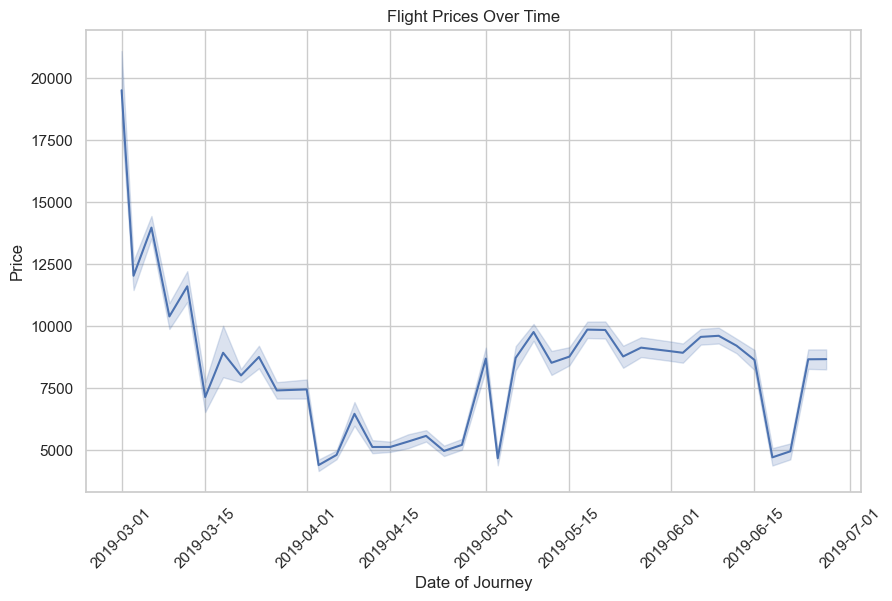

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_excel('flight_price.xlsx')

# Convert Date_of_Journey to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# Clean Duration column
df['Duration'] = df['Duration'].str.replace('h', 'h ').str.replace('m', 'm')
df['Duration'] = df['Duration'].apply(convert_duration)

# Extract month and day of the week for seasonal analysis
df['Month'] = df['Date_of_Journey'].dt.month
df['Day_of_Week'] = df['Date_of_Journey'].dt.day_name()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Date_of_Journey', y='Price', data=df)
plt.title('Flight Prices Over Time')
plt.xlabel('Date of Journey')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()



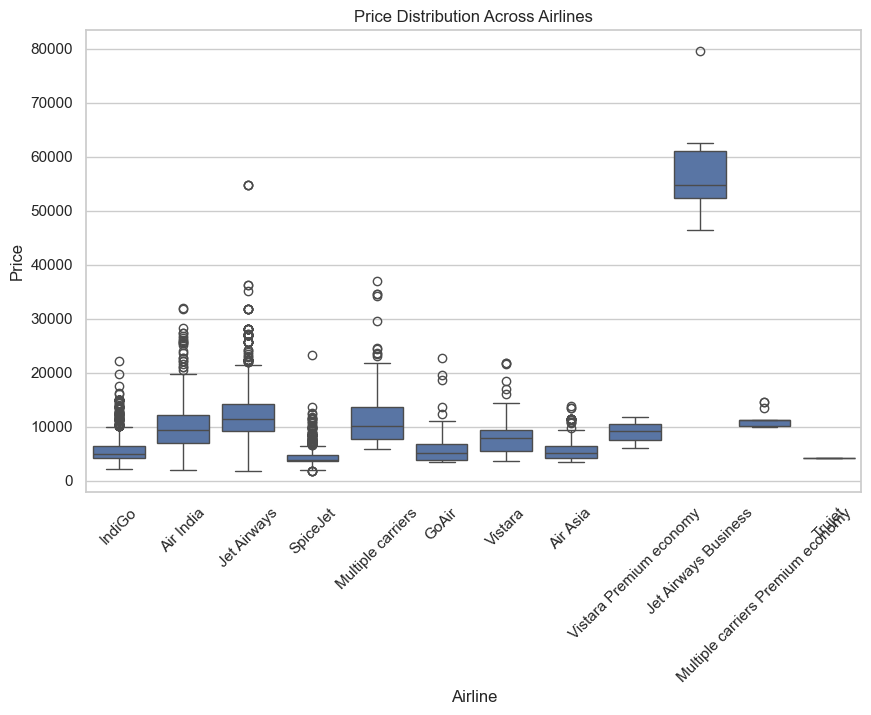

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Price Distribution Across Airlines')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


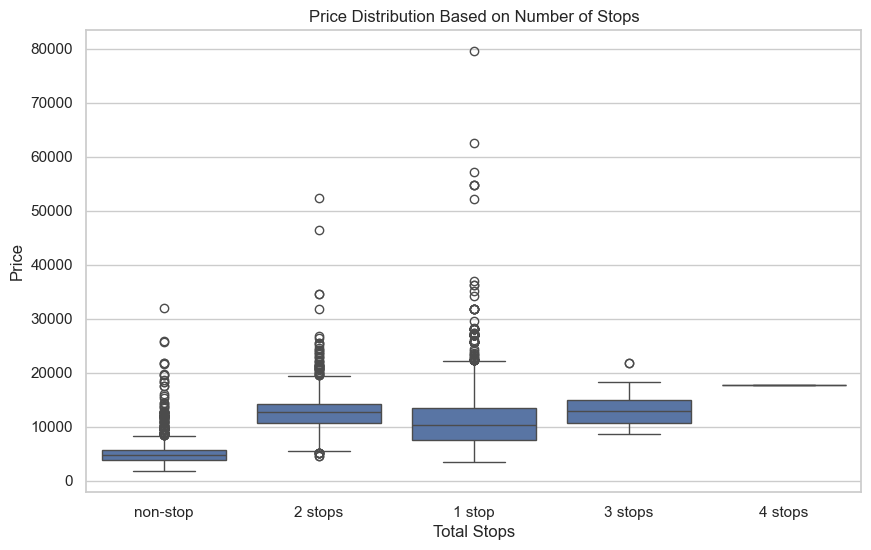

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Price Distribution Based on Number of Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

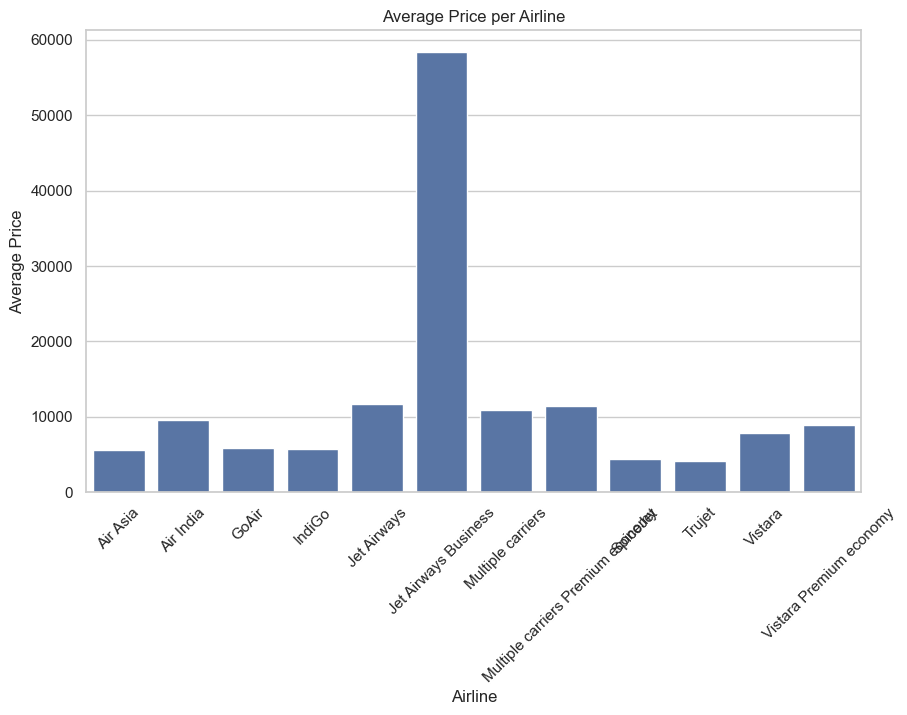

In [11]:
plt.figure(figsize=(10, 6))
airline_avg_price = df.groupby('Airline')['Price'].mean().reset_index()
sns.barplot(x='Airline', y='Price', data=airline_avg_price)
plt.title('Average Price per Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


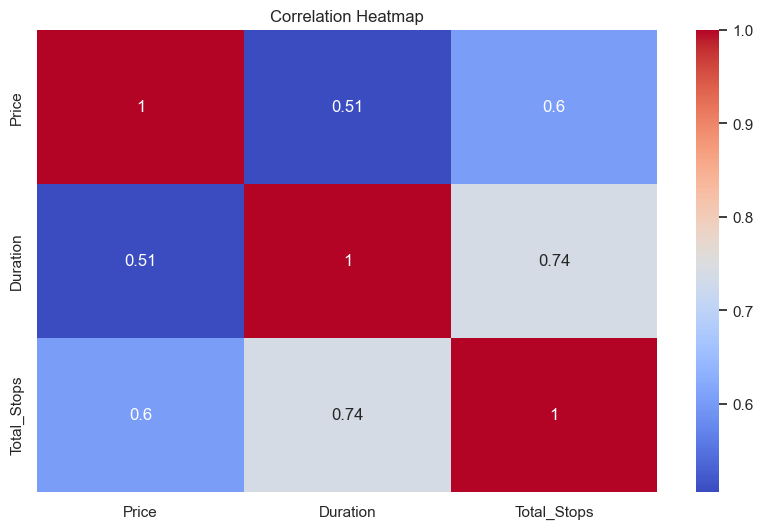

In [12]:
import numpy as np
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

plt.figure(figsize=(10, 6))
corr = df[['Price', 'Duration', 'Total_Stops']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

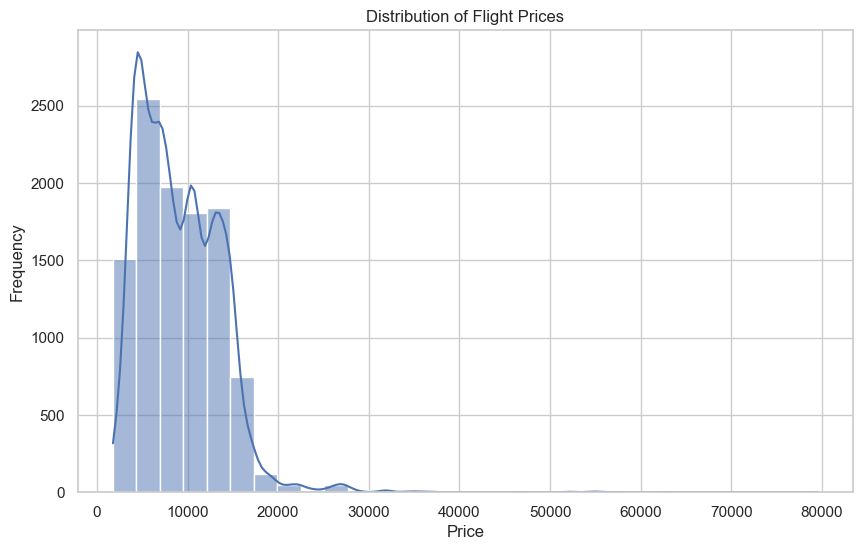

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


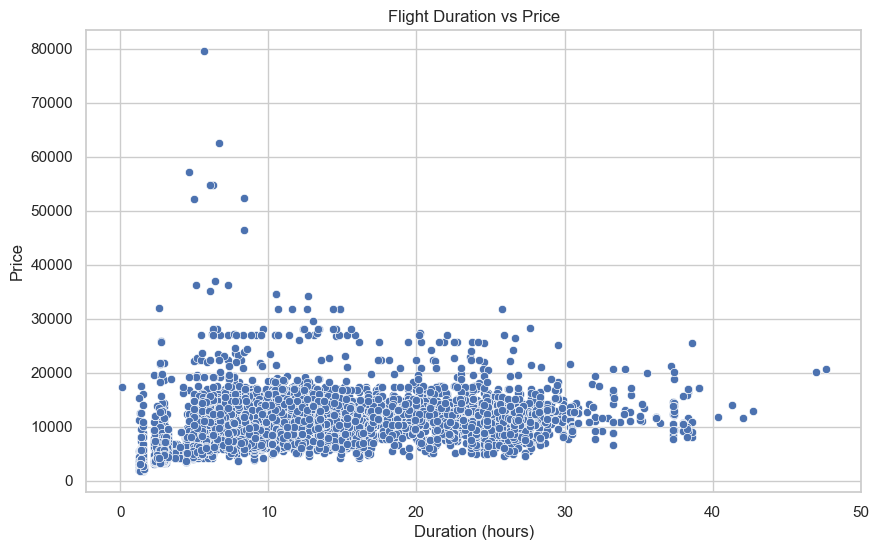

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Price', data=df)
plt.title('Flight Duration vs Price')
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.show()


#### Q8. You are a data scientist working for an airline company, and you have been asked to analyze theFlight Price dataset to identify the factors that affect flight prices. What features would you analyze toidentify these factors, and how would you present your findings to the management team?

continue soon...

In [15]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Google Playstore:

#### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns doesthe dataset have?


In [16]:
import pandas as pd

# Load the dataset
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Examine the dimensions
dimensions = df.shape
num_rows, num_columns = dimensions

print(f"The dataset has {num_rows} rows and {num_columns} columns.")


The dataset has 10841 rows and 13 columns.


In [17]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of differentapp categories.

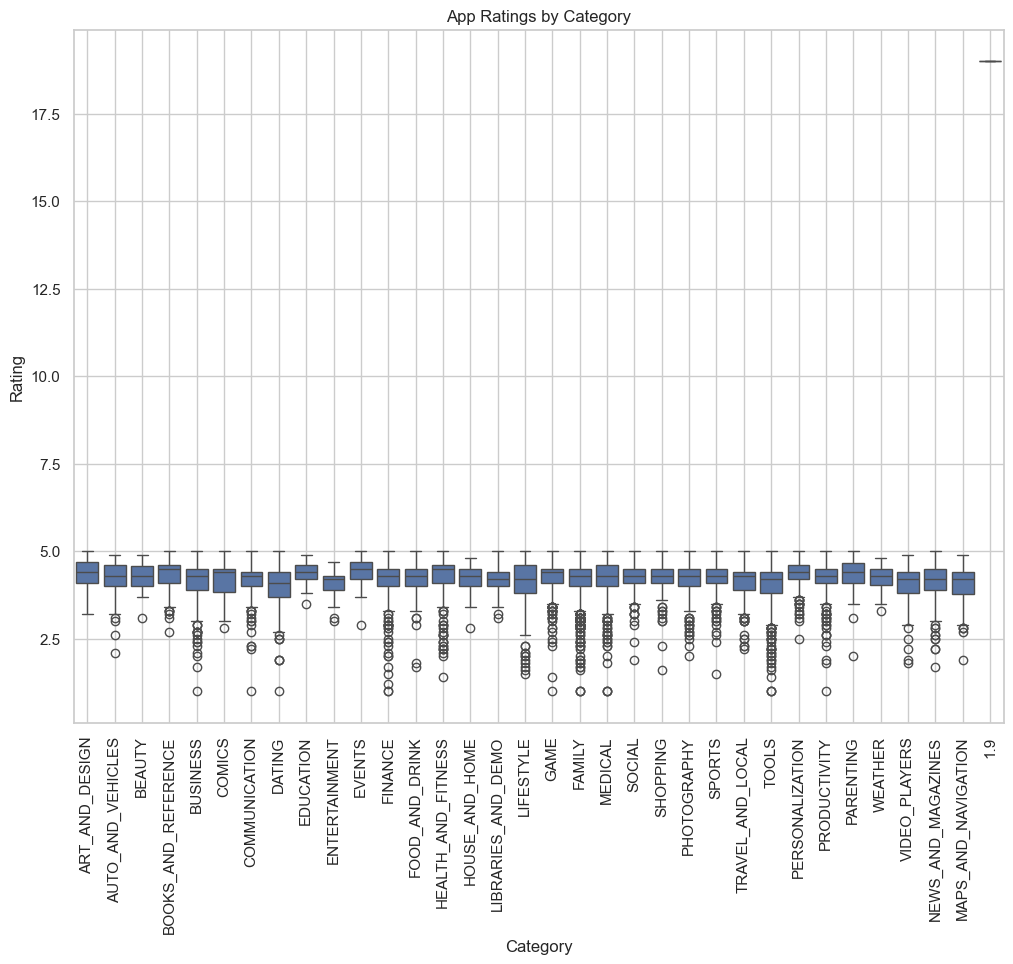

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv'
df = pd.read_csv(url)

# Clean the data (e.g., convert Rating to numeric and handle missing values)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.dropna(subset=['Rating', 'Category'], inplace=True)

# Create the boxplot
plt.figure(figsize=(12, 9))
sns.boxplot(data=df, x='Category', y='Rating')
plt.xticks(rotation=90)  # Rotate category names for better readability
plt.title('App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


#### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.


In [19]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv'
df = pd.read_csv(url)

# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_info = missing_values[missing_values > 0]
print("Missing Values in the Dataset:")
print(missing_info)

# Total missing values
total_missing = missing_info.sum()
print(f"\nTotal Missing Values: {total_missing}")


Missing Values in the Dataset:
Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64

Total Missing Values: 1487


#### Impact of Missing Values on Analysis

1. **Rating (1474 missing values)**
   - **Impact:** The Rating column is critical for assessing app quality. Missing ratings can bias your analysis, particularly if you're trying to compute average ratings by category or perform correlations with other features. The absence of ratings may lead to misleading conclusions about certain categories or overall app performance.
   - **Potential Solutions:** You could impute missing ratings based on the mean or median of ratings within each category or use a more sophisticated method like regression imputation. However, this might introduce bias if the missing data is not random.

2. **Type (1 missing value)**
   - **Impact:** The Type column (Free or Paid) can influence users' purchasing behavior and app downloads. A single missing value here is unlikely to significantly impact your analysis, but it should still be addressed to maintain data integrity.
   - **Potential Solutions:** You could drop this single missing entry or assign it a default value (e.g., "Free") based on the distribution of the Type column.

3. **Content Rating (1 missing value)**
   - **Impact:** Similar to the Type column, a missing content rating may have a negligible effect on overall analysis but could limit insights into user demographics or app suitability. If you're analyzing trends by content rating, it could skew results.
   - **Potential Solutions:** You can drop this entry or assign a common category based on the distribution of other content ratings.

4. **Current Ver (8 missing values)**
   - **Impact:** The Current Version column might not be critical for all analyses, but missing values can limit insights into app updates and their correlation with ratings or downloads. It may hinder a detailed analysis of version trends over time.
   - **Potential Solutions:** Dropping these entries or filling them with a placeholder value (e.g., "Unknown") could be a practical approach.

5. **Android Ver (3 missing values)**
   - **Impact:** The Android Version is important for understanding the compatibility of apps with devices. Missing values could affect analyses related to market reach or user base segmentation. If you're examining app performance based on device compatibility, this could skew results.
   - **Potential Solutions:** You can drop these entries or fill in the missing values with a placeholder or the most common Android version.

#### Summary
In total, there are **1487** missing values out of **10841** entries, which is about **13.7%** of the data. While some missing values may not significantly impact the overall dataset, the missing ratings are particularly concerning. Addressing these missing values is crucial to ensure your analysis is accurate and reliable. Proper handling can enhance insights and lead to more informed conclusions about app performance and trends.



#### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualizethe relationship.

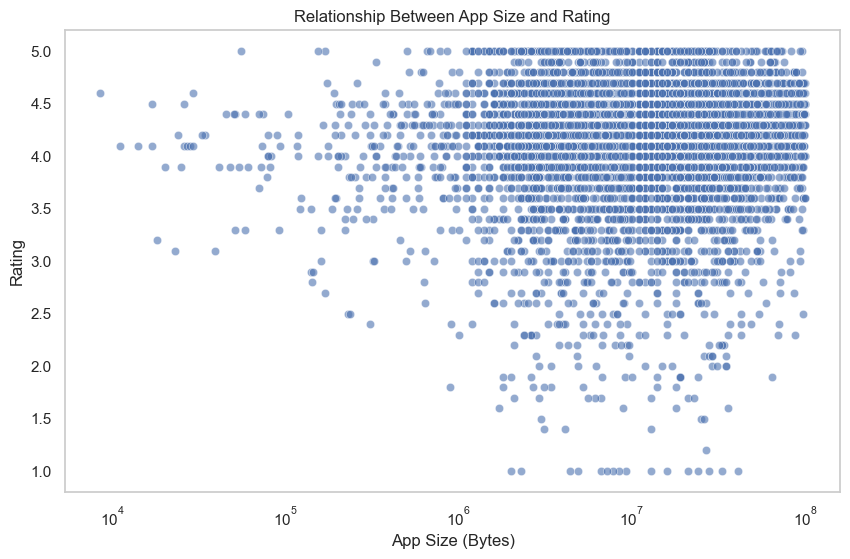

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv'
df = pd.read_csv(url)

# Data cleaning: Convert 'Size' to numeric values (remove 'M', 'k', and convert to float)
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '').strip()) * 1_000_000
    elif 'k' in size:
        return float(size.replace('k', '').strip()) * 1_000
    return None

df['Size'] = df['Size'].apply(convert_size)

# Drop rows with NaN values in 'Rating' or 'Size'
df = df.dropna(subset=['Rating', 'Size'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Size', y='Rating', alpha=0.6)
plt.title('Relationship Between App Size and Rating')
plt.xlabel('App Size (Bytes)')
plt.ylabel('Rating')
plt.xscale('log')  # Optional: use log scale for better visualization
plt.grid()
plt.show()


#### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv'
df = pd.read_csv(url)

In [22]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [23]:
df = df[df['Price'] != 'Everyone']
price_frequency = df["Price"].value_counts().to_string()
print(price_frequency)


Price
0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

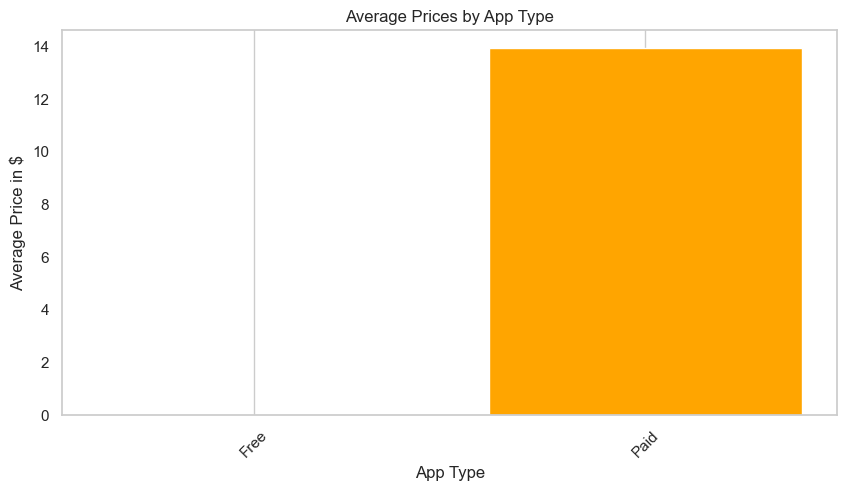

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv'
data = pd.read_csv(url)

# Data cleaning
# Remove rows with missing or invalid prices
# Replace dollar signs and spaces in the 'Price' column, and remove non-numeric values
data['Price'] = data['Price'].replace({'\$': '', 'Everyone': ''}, regex=True)

# Filter out any rows where 'Price' is not numeric
data = data[pd.to_numeric(data['Price'], errors='coerce').notnull()]
data['Price'] = data['Price'].astype(float)

# Remove rows with missing values in 'Type' column
data = data[data['Type'].notnull()]

# Calculate average price by app type
average_price_by_type = data.groupby('Type')['Price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(average_price_by_type['Type'], average_price_by_type['Price'], color=['blue', 'orange'])
plt.xlabel('App Type')
plt.ylabel('Average Price in $')
plt.title('Average Prices by App Type')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [25]:
# url = 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv'
# df = pd.read_csv(url)

#### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [26]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv'
df = pd.read_csv(url)

# Clean the 'Installs' column
df['Installs'] = df['Installs'].str.replace(',', '')  # Remove commas
df['Installs'] = df['Installs'].str.replace('+', '')  # Remove '+' sign
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')  # Convert to numeric

# Create a frequency table for the top 10 most popular apps
top_apps = df[['App', 'Installs']].dropna().sort_values(by='Installs', ascending=False).head(10)

# Display the top 10 apps
top_apps


,App,Installs
3896,Subway Surfers,1.000000e+09
3943,Facebook,1.000000e+09
335,Messenger – Text and Video Chat for Free,1.000000e+09
3523,Google Drive,1.000000e+09
3565,Google Drive,1.000000e+09
2884,Google Photos,1.000000e+09
3665,YouTube,1.000000e+09
2853,Google Photos,1.000000e+09
4234,Skype - free IM & video calls,1.000000e+09
3687,Google Play Movies & TV,1.000000e+09


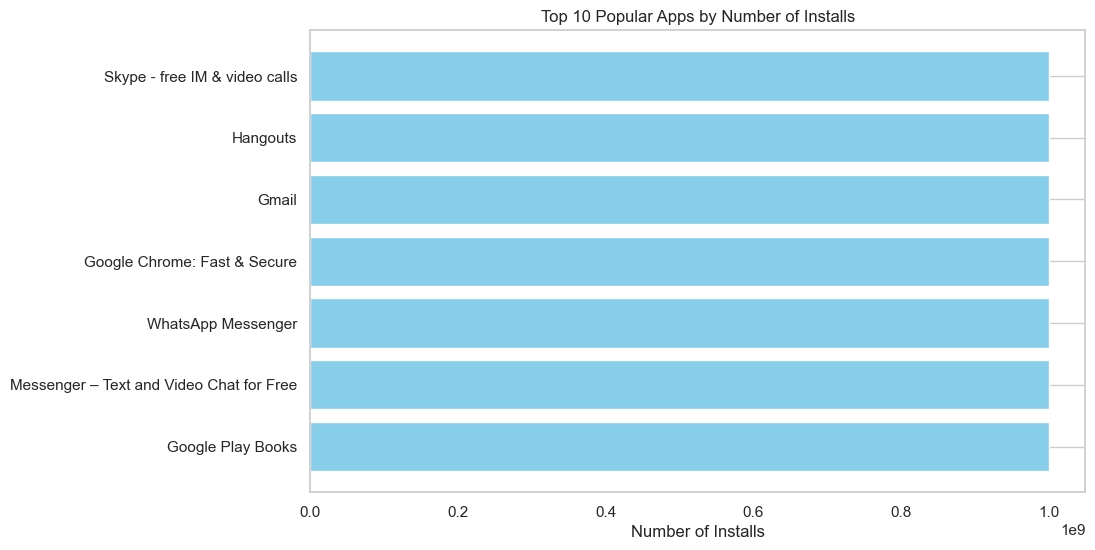

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv'
data = pd.read_csv(url)

# Data cleaning for 'Installs' column
# Remove any non-numeric characters (like '+' and ',') and convert to integer
data['Installs'] = data['Installs'].replace({'\$': '', ',': '', '\+': ''}, regex=True)
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

# Remove rows with NaN values in 'Installs'
data = data[data['Installs'].notnull()]

# Get top 10 popular apps based on the number of installs
top_10_popular_apps = data.nlargest(10, 'Installs')[['App', 'Installs']]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_popular_apps['App'], top_10_popular_apps['Installs'], color='skyblue')
plt.xlabel('Number of Installs')
plt.title('Top 10 Popular Apps by Number of Installs')
plt.grid(axis='x')
plt.show()


#### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

              Category    Rating       Reviews      Installs
14                GAME  4.286326  1.585420e+09  3.508586e+10
6        COMMUNICATION  4.158537  8.154618e+08  3.264724e+10
25        PRODUCTIVITY  4.211396  1.141167e+08  1.417607e+10
27              SOCIAL  4.255598  6.212411e+08  1.406984e+10
29               TOOLS  4.047411  2.731842e+08  1.145072e+10
11              FAMILY  4.192272  4.102231e+08  1.025770e+10
24         PHOTOGRAPHY  4.192114  2.135166e+08  1.008824e+10
21  NEWS_AND_MAGAZINES  4.132189  5.439990e+07  7.496211e+09
30    TRAVEL_AND_LOCAL  4.109292  6.261777e+07  6.868859e+09
31       VIDEO_PLAYERS  4.063750  1.103797e+08  6.221897e+09


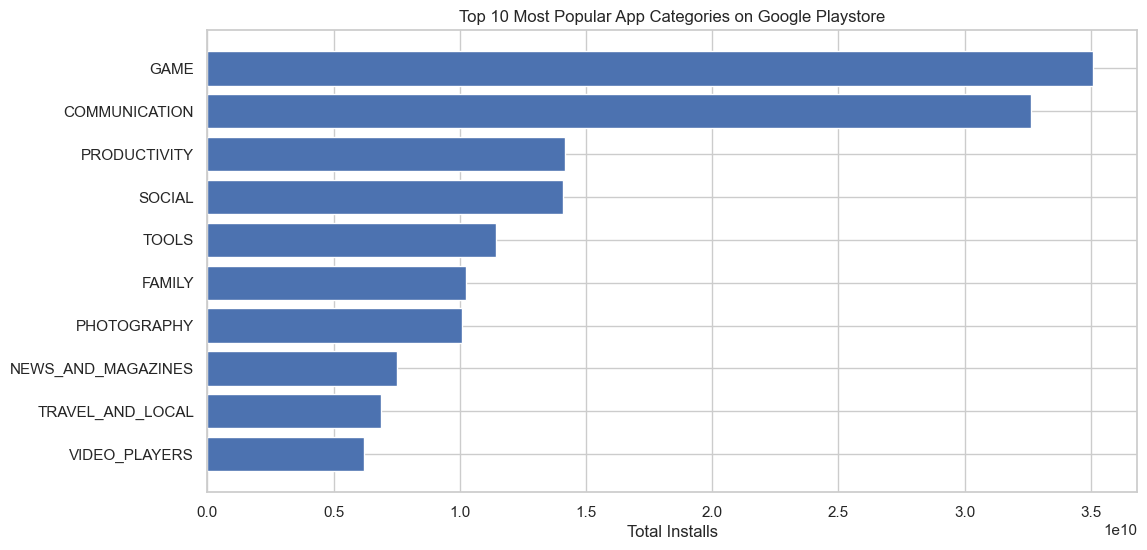

In [28]:
import pandas as pd
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv'
df = pd.read_csv(url)

# Data Cleaning
# Convert 'Installs' to numeric, removing '+' and ',' if present
df['Installs'] = pd.to_numeric(df['Installs'].str.replace('+', '').str.replace(',', ''), errors='coerce')

# Convert 'Price' to numeric, removing '$' if present
df['Price'] = pd.to_numeric(df['Price'].str.replace('$', ''), errors='coerce')

# Convert 'Reviews' to numeric, handling errors
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Handle missing values (drop rows with NaN values in key columns)
df = df.dropna(subset=['Category', 'Rating', 'Reviews', 'Installs'])

# Group by Category and calculate average metrics
category_analysis = df.groupby('Category').agg({
    'Rating': 'mean',
    'Reviews': 'sum',
    'Installs': 'sum'
}).reset_index()

# Sort by Installs to find the most popular categories
category_analysis = category_analysis.sort_values(by='Installs', ascending=False)

# Display the top categories
print(category_analysis.head(10))

# Optional: Visualize the results (requires Matplotlib or Seaborn)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(category_analysis['Category'].head(10), category_analysis['Installs'].head(10))
plt.xlabel('Total Installs')
plt.title('Top 10 Most Popular App Categories on Google Playstore')
plt.gca().invert_yaxis()
plt.show()


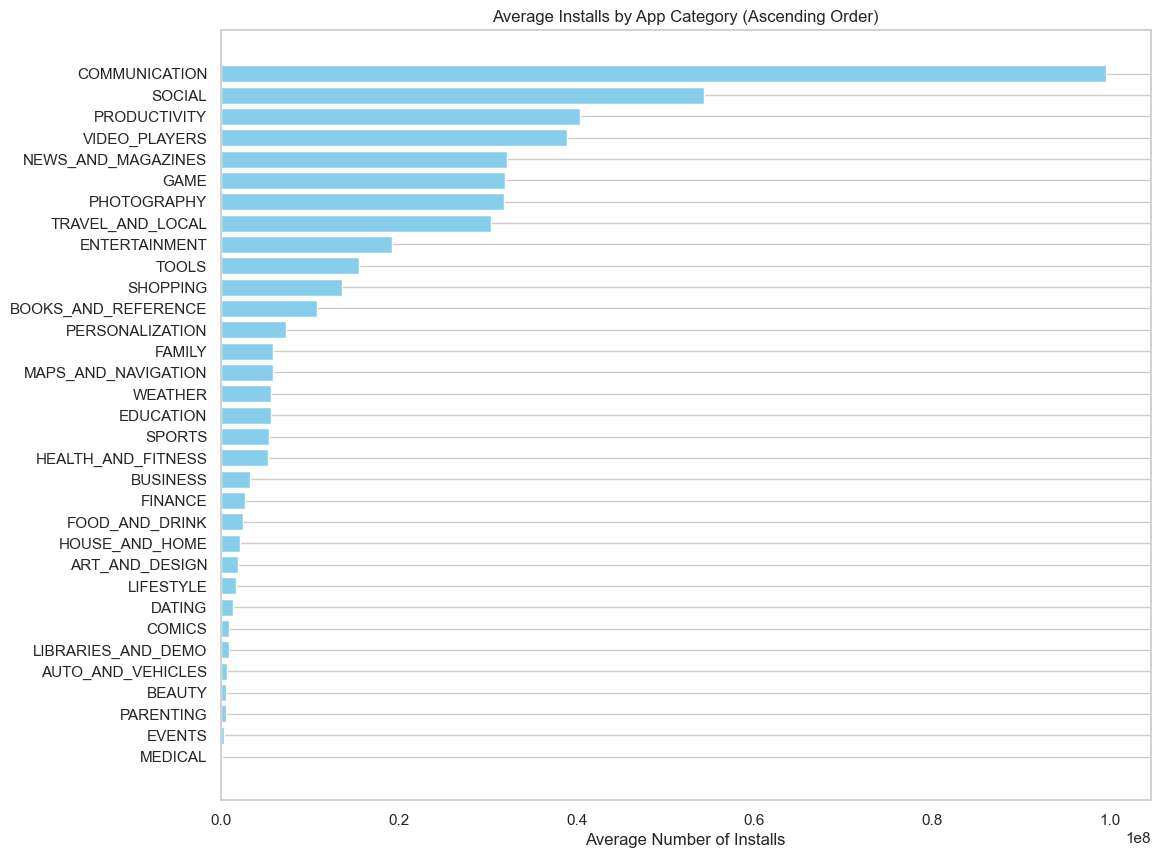

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv'
data = pd.read_csv(url)

# Data cleaning
data['Installs'] = data['Installs'].replace({'\$': '', ',': '', '\+': ''}, regex=True)
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')
data = data.dropna(subset=['Category', 'Installs', 'Rating'])

# Group by Category
category_summary = data.groupby('Category').agg({'Installs': 'mean', 'Rating': 'mean', 'Reviews': 'sum'}).reset_index()

# Sort the DataFrame by average installs in ascending order
category_summary = category_summary.sort_values(by='Installs')

# Plotting
plt.figure(figsize=(12, 10))
plt.barh(category_summary['Category'], category_summary['Installs'], color='skyblue')
plt.xlabel('Average Number of Installs')
plt.title('Average Installs by App Category (Ascending Order)')
plt.grid(axis='x')
plt.show()


#### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


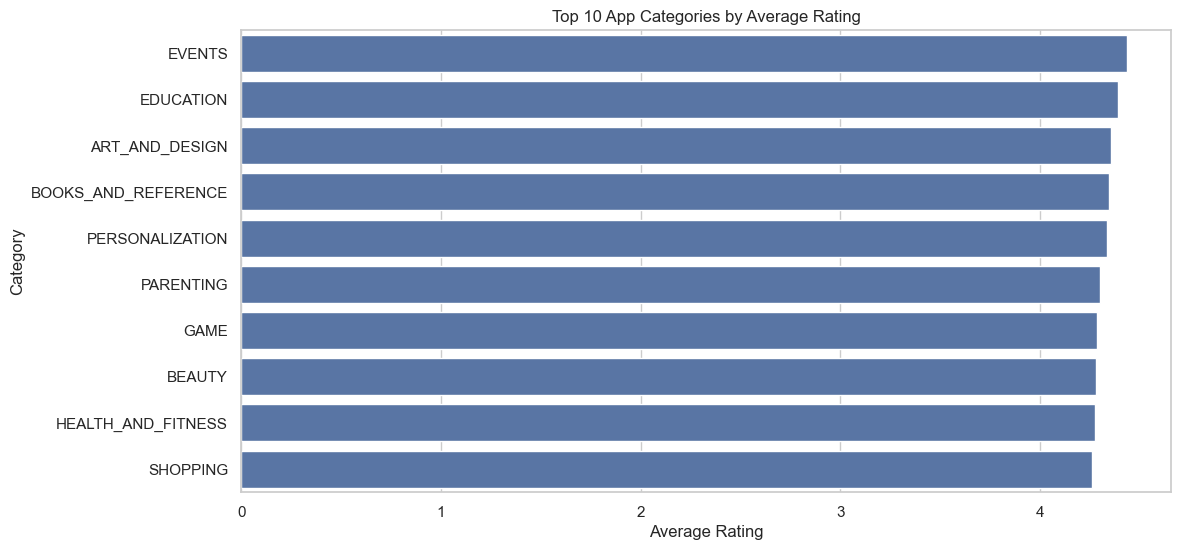

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv'
df = pd.read_csv(url)

# Check the column names
print(df.columns)

# Data cleaning
# Convert 'Installs' to numeric, removing '+' and ',' characters
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')  # Convert to numeric and handle errors

# Convert 'Price' to numeric, removing '$' sign and ensuring it's handled properly
df['Price'] = df['Price'].replace({'\$': '', 'Free': '0'}, regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to numeric and handle errors

# Handle 'Rating' (make sure to drop NaN values)
df = df.dropna(subset=['Rating', 'Installs'])

# Analysis: Group by Category
category_success = df.groupby('Category').agg({
    'Rating': 'mean',
    'Reviews': 'sum',
    'Installs': 'sum'
}).reset_index()

# Sort by average rating
category_success = category_success.sort_values(by='Rating', ascending=False)

# Visualization: Bar chart of categories by average rating
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Category', data=category_success.head(10))
plt.title('Top 10 App Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

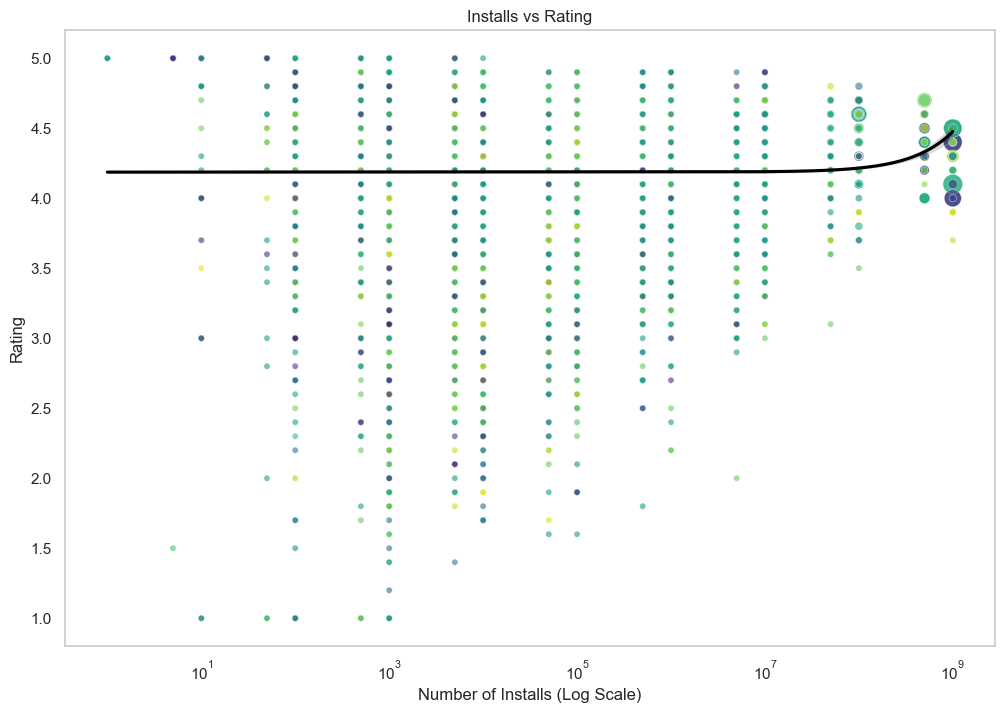

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv'
data = pd.read_csv(url)

# Data cleaning
# Clean the 'Installs' column
data['Installs'] = data['Installs'].replace({'\$': '', ',': '', '\+': ''}, regex=True)
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

# Clean the 'Reviews' column
data['Reviews'] = data['Reviews'].replace({'\$': '', ',': ''}, regex=True)
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

# Drop rows with missing values in critical columns
data = data.dropna(subset=['Installs', 'Rating', 'Reviews'])

# Check for invalid ratings (e.g., ratings greater than 5 or less than 0)
data = data[(data['Rating'] >= 0) & (data['Rating'] <= 5)]

# Scatter plot for installs vs ratings
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='Installs', y='Rating', 
                          data=data, 
                          alpha=0.6, 
                          size='Reviews', 
                          sizes=(20, 200),  # Adjust marker sizes
                          hue='Category',   # Color by category
                          palette='viridis', # Color palette
                          legend=None)      # Hide legend for clarity

# Add regression line
sns.regplot(x='Installs', y='Rating', data=data, scatter=False, color='black')

plt.title('Installs vs Rating')
plt.xlabel('Number of Installs (Log Scale)')
plt.ylabel('Rating')
plt.xscale('log')  # Log scale for better visibility
plt.grid()
plt.show()


#### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

**Step 1: Data Preparation and Cleaning**

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df_cleaned = df.dropna()

# Convert 'Installs' to numeric (removing '+' and ',')
df_cleaned['Installs'] = df_cleaned['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Convert 'Reviews' to numeric
df_cleaned['Reviews'] = pd.to_numeric(df_cleaned['Reviews'], errors='coerce')

# Convert 'Price' (if applicable) to numeric by removing '$' sign
df_cleaned['Price'] = df_cleaned['Price'].str.replace('$', '').astype(float)

# Convert 'Last Updated' to datetime format
df_cleaned['Last Updated'] = pd.to_datetime(df_cleaned['Last Updated'])

# Display first few rows to check data
print(df_cleaned.head())


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159   19M     10000  Free    0.0       Everyone   
1      967   14M    500000  Free    0.0       Everyone   
2    87510  8.7M   5000000  Free 

C:\Users\15dha\AppData\Local\Temp\ipykernel_10704\3385123802.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Installs'] = df_cleaned['Installs'].str.replace('[+,]', '', regex=True).astype(int)
C:\Users\15dha\AppData\Local\Temp\ipykernel_10704\3385123802.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Reviews'] = pd.to_numeric(df_cleaned['Reviews'], errors='coerce')
C:\Users\15dha\AppData\Local\Temp\ipykernel_10704\3385123802.py:22: SettingWithCopyWarning: 
A value is trying

**Step 2: Feature Analysis**
- 1. Install Trend Analysis

C:\Users\15dha\AppData\Local\Temp\ipykernel_10704\4202300628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'Year_Month'] = df_cleaned['Last Updated'].dt.to_period('M')


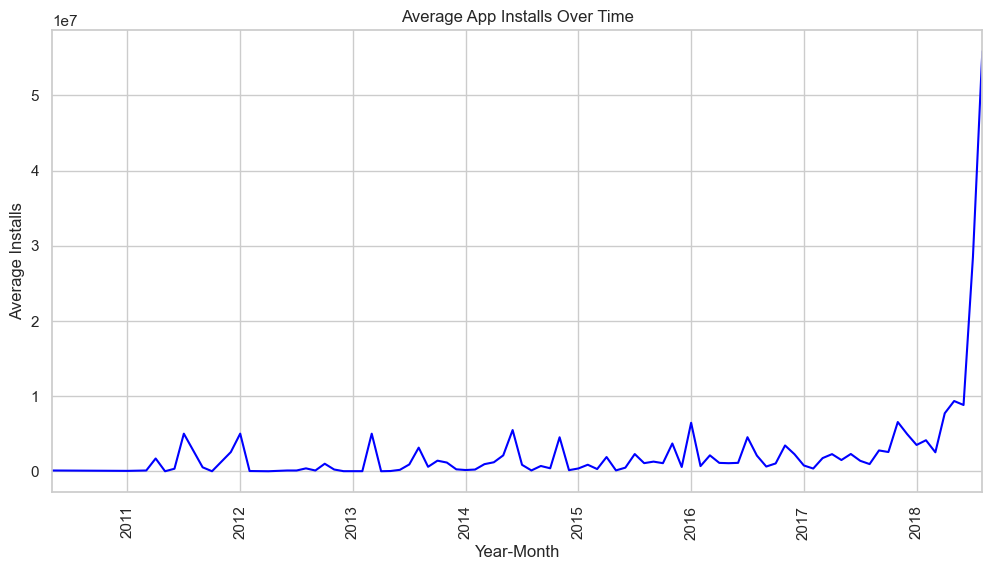

In [33]:
# Create a new column for 'Year-Month' from 'Last Updated' to analyze time-based trends
df_cleaned.loc[:, 'Year_Month'] = df_cleaned['Last Updated'].dt.to_period('M')

# Group by 'Year_Month' to get average installs
installs_trend = df_cleaned.groupby('Year_Month')['Installs'].mean()

# Plotting the install trends over time
plt.figure(figsize=(12,6))
installs_trend.plot(kind='line', color='blue')
plt.title('Average App Installs Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Installs')
plt.xticks(rotation=90)
plt.show()


- 2. Rating Analysis by Category Over Time

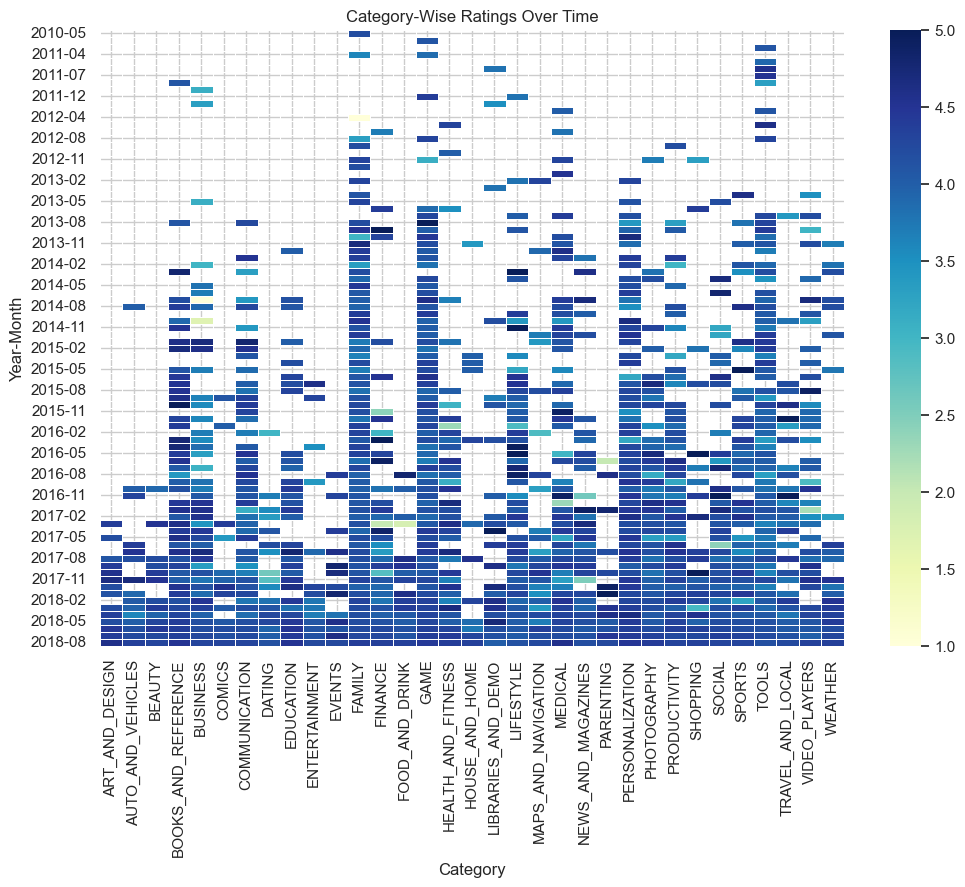

In [34]:
# Group by 'Year_Month' and 'Category' to get average ratings per category over time
rating_trend = df_cleaned.groupby(['Year_Month', 'Category'])['Rating'].mean().unstack()

# Plotting heatmap to visualize ratings trend per category
plt.figure(figsize=(12,8))
sns.heatmap(rating_trend, cmap='YlGnBu', annot=False, linewidths=.5)
plt.title('Category-Wise Ratings Over Time')
plt.xlabel('Category')
plt.ylabel('Year-Month')
plt.xticks(rotation=90)
plt.show()


- 3. Reviews and Installs by Category

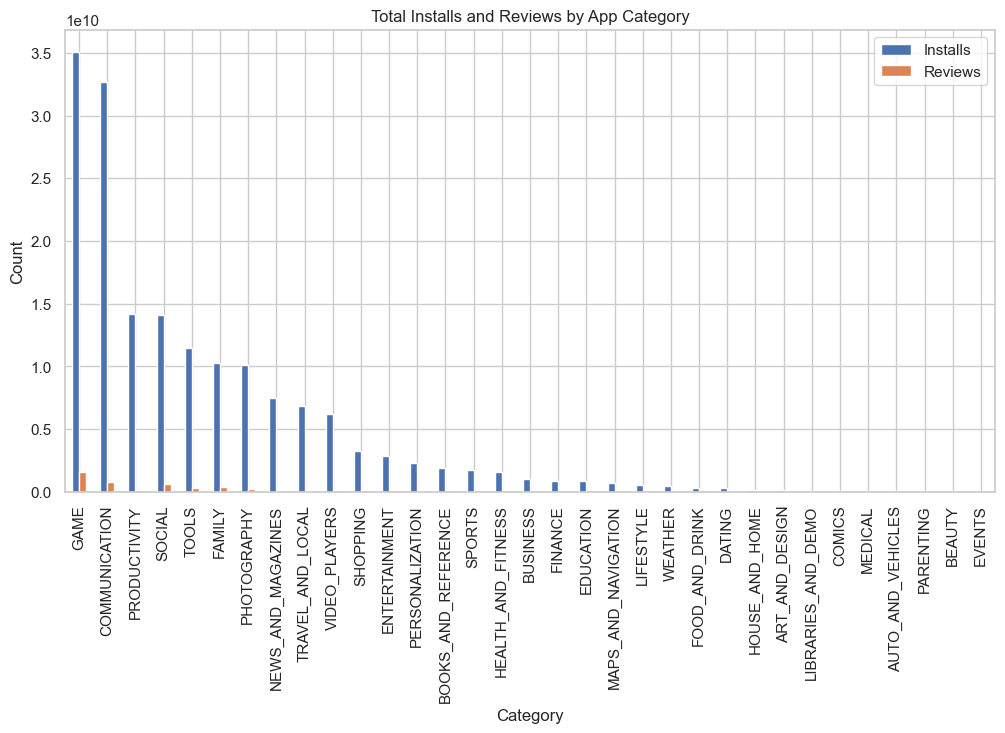

In [35]:
# Group by 'Category' to calculate the total installs and reviews per category
category_analysis = df_cleaned.groupby('Category')[['Installs', 'Reviews']].sum().sort_values(by='Installs', ascending=False)

# Plotting bar chart of installs and reviews by category
category_analysis.plot(kind='bar', figsize=(12,6))
plt.title('Total Installs and Reviews by App Category')
plt.ylabel('Count')
plt.show()


**Step 3: Time-Based Visualizations**
- 4. Rating vs. Installs

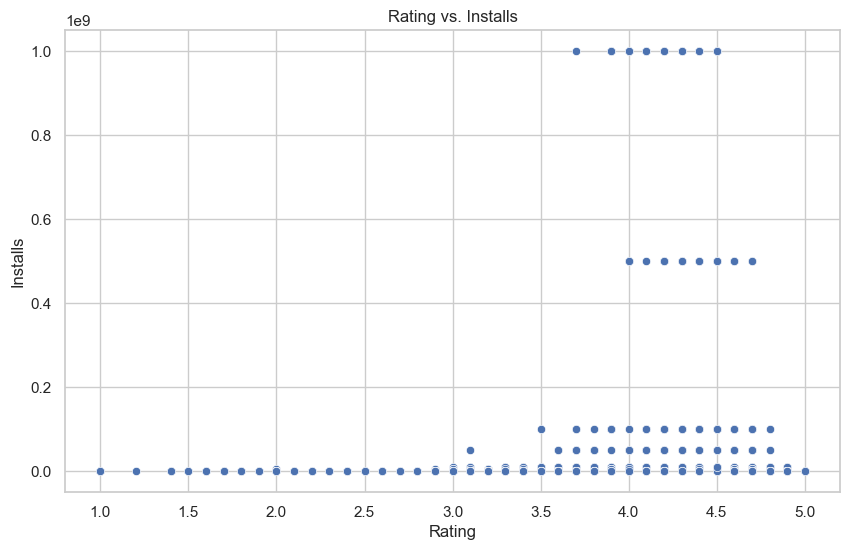

In [36]:
# Scatter plot of Rating vs. Installs
plt.figure(figsize=(10,6))
sns.scatterplot(x='Rating', y='Installs', data=df_cleaned)
plt.title('Rating vs. Installs')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.show()


**Step 4: Seasonality and Peak Period Identification**
- 5. Identifying Seasonal Trends (if you want to identify a specific period, e.g., holidays)

C:\Users\15dha\AppData\Local\Temp\ipykernel_10704\86413900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['Last Updated'].dt.month


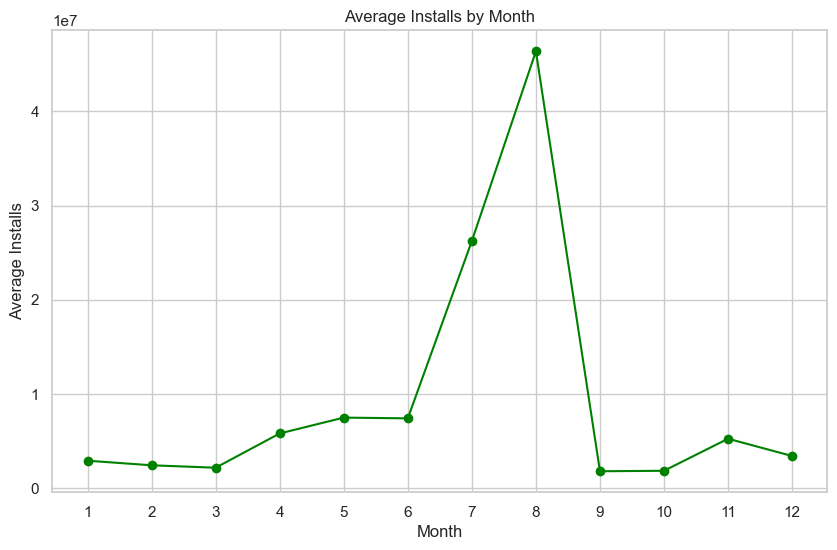

In [37]:
# Extract month from 'Last Updated' to check for seasonality
df_cleaned['Month'] = df_cleaned['Last Updated'].dt.month

# Group by month to see installs by season
monthly_installs = df_cleaned.groupby('Month')['Installs'].mean()

# Plotting monthly installs
plt.figure(figsize=(10,6))
monthly_installs.plot(kind='line', marker='o', color='green')
plt.title('Average Installs by Month')
plt.xlabel('Month')
plt.ylabel('Average Installs')
plt.xticks(np.arange(1,13,1))
plt.grid(True)
plt.show()
